Testing getting galaxies from the EAGLE database

In [1]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Connect to the database with username and password
con = sql.connect("nkl161", password="FCGxrt20")

In [69]:
# Define the simulation name and comoving box length
sim_name = 'RefL0100N1504'
sim_size = 100.
snap_num = 28

Testing out with galaxy main sequence, of Stellar Mass vs. SFR

In [84]:
# Define the query as a string written in SQL
sequence_query = """
SELECT
    sub.GalaxyID as ID,
    sub.StarFormationRate as SFR,
    sub.MassType_Star as Mstar
FROM
    %s_SubHalo as sub,
    %s_Aperture as ap
WHERE
    sub.GalaxyID = ap.GalaxyID and
    ap.ApertureSize = 30 and
    sub.MassType_Star > 1e9 and
    sub.Snapnum = %s
"""%(sim_name, sim_name, snap_num)

In [81]:
# Execute the query by connecting to the database and sending the query
sequ_data = sql.execute_query(con, sequence_query)

In [82]:
print(min(sequ_data['SFR']), max(sequ_data['SFR']))

0.0 36.118923


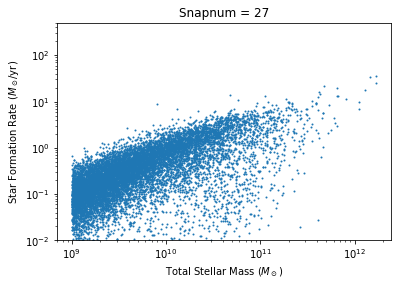

In [83]:
plt.scatter(sequ_data['Mstar'], sequ_data['SFR'], s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2,5e2)
plt.xlabel('Total Stellar Mass ($M_\odot$)')
plt.ylabel('Star Formation Rate ($M_\odot$/yr)')
plt.title('Snapnum = '+str(snap_num))
plt.show()